<a href="https://colab.research.google.com/github/theBuluku/mchezo-limited/blob/master/Mchezo_Pesa_Limited_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM STATEMENT

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

#Metrics of Success.

1.Polynomial regression approach the metrics of success are RootMeanSquaredError and r2_score

2.Logistic approach metrics of success are f1-score accuracy and confusion matrix

In [0]:
#Importing the environments For analysis.
import sys
import pandas as pd
import matplotlib
import sklearn
import numpy as np

In [0]:
#Importing relevant environments to use for analysis.
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder,OneHotEncoder

In [180]:
#Loading our rankings dataset
rankings_dataset= pd.read_csv('fifa_ranking.csv')
rankings_dataset.head(6)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [181]:
#Loading our results dataset.
results_dataset=pd.read_csv('results.csv')
results_dataset.head(6)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False


In [182]:
#Checking the number of features and attributes.
print(rankings_dataset.shape)

(57793, 16)


In [183]:
#Checking the number of features and attributes.
print(results_dataset.shape)

(40839, 9)


In [184]:
#Checking for more information on the rankings dataset.
print(rankings_dataset.head(5))

   rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08
3     4       Sweden  ...          UEFA  1993-08-08
4     5    Argentina  ...      CONMEBOL  1993-08-08

[5 rows x 16 columns]


In [185]:
print(results_dataset.head(5))

         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-06   England  Scotland  ...   London   England   False
4  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]


In [186]:
#Description statistics for the rankings dataset
print(rankings_dataset.describe())

               rank  total_points  ...  three_year_ago_avg  three_year_ago_weighted
count  57793.000000  57793.000000  ...        57793.000000             57793.000000
mean     101.628086    122.068637  ...           59.173916                11.834811
std       58.618424    260.426863  ...          135.533343                27.106675
min        1.000000      0.000000  ...            0.000000                 0.000000
25%       51.000000      0.000000  ...            0.000000                 0.000000
50%      101.000000      0.000000  ...            0.000000                 0.000000
75%      152.000000     92.790000  ...           21.250000                 4.250000
max      209.000000   1775.030000  ...         1200.770000               240.150000

[8 rows x 12 columns]


In [187]:
#Statistical overview of the results dataset
print(results_dataset.describe())

         home_score    away_score
count  40839.000000  40839.000000
mean       1.745709      1.188105
std        1.749145      1.405120
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000


In [188]:
#Checking the Column names on the rankings dataset.
rankings_dataset.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [189]:
#Checking the names of columns in the results dataset.
results_dataset.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [190]:
#Checking for information on rankings dataset
print(rankings_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB
None


In [191]:
#Checking information of the results dataset.
print(results_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
None


In [193]:
#Getting rid of the unwanted columns
rankings_dataset=rankings_dataset.drop(['country_abrv','cur_year_avg','cur_year_avg_weighted','total_points',
                                        'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted'],axis=1)
rankings_dataset.head(6)

,rank,country_full,previous_points,rank_change,last_year_avg,last_year_avg_weighted,confederation,rank_date
0,1,Germany,57,0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,57,0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,50,9,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,55,0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,51,5,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,54,0,0.0,0.0,UEFA,1993-08-08


In [0]:
results_dataset=results_dataset.drop(['city'],axis=1)

In [196]:
#Renaming our two columns for easier merging.
rankings_dataset.rename(columns={"country_full":"country","rank_date":"date"}, inplace=True)
rankings_dataset.columns

Index(['rank', 'country', 'previous_points', 'rank_change', 'last_year_avg',
       'last_year_avg_weighted', 'confederation', 'date'],
      dtype='object')

In [197]:
#Merging the two datasets with country and date.
rankings_results=pd.merge(rankings_dataset,results_dataset,on=["country","date"])
rankings_results.head(6)

,rank,country,previous_points,rank_change,last_year_avg,last_year_avg_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,neutral
0,8,Brazil,55,-5,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,False
1,35,Ecuador,23,30,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False
2,50,Zimbabwe,27,4,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False
3,59,Bolivia,13,28,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False
4,65,Guinea,23,-2,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False
5,67,Paraguay,22,1,0.0,0.0,CONMEBOL,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False


In [198]:
#Checking the number of rows and columns after merging.
rankings_results.shape

(950, 14)

#EXPLORATORY DATA ANALYSIS.

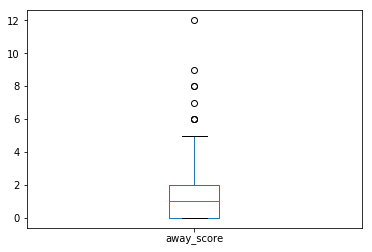

In [199]:
#checking for outliers on away_scores
rankings_results['away_score'].plot(kind='box')

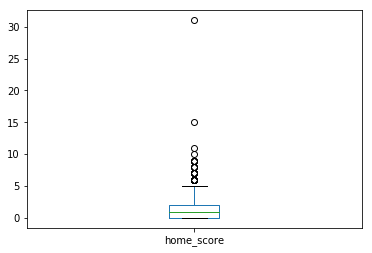

In [200]:
#checking for outliers on home_scores
rankings_results['home_score'].plot(kind='box')

In [201]:
rankings_results.corr()

,rank,previous_points,rank_change,last_year_avg,last_year_avg_weighted,home_score,away_score,neutral
rank,1.000000,-0.612405,-0.060181,-0.096341,-0.096340,-0.016345,0.052657,0.023620
previous_points,-0.612405,1.000000,-0.031568,0.227159,0.227158,-0.010888,-0.010227,0.116232
rank_change,-0.060181,-0.031568,1.000000,-0.015667,-0.015667,0.043233,-0.038677,-0.000194
last_year_avg,-0.096341,0.227159,-0.015667,1.000000,1.000000,0.047322,0.060099,0.147711
last_year_avg_weighted,-0.096340,0.227158,-0.015667,1.000000,1.000000,0.047323,0.060099,0.147710
home_score,-0.016345,-0.010888,0.043233,0.047322,0.047323,1.000000,-0.130928,0.022904
away_score,0.052657,-0.010227,-0.038677,0.060099,0.060099,-0.130928,1.000000,0.147866
neutral,0.023620,0.116232,-0.000194,0.147711,0.147710,0.022904,0.147866,1.000000


In [202]:
#checking for null values
rankings_results.isnull().sum().any()

False

In [203]:
#checking for the duplicates
rankings_results.duplicated().any()

False

In [206]:
rankings_results[['tournament','country','home_team', 'away_team','confederation']] = rankings_results[['tournament','country','home_team', 'away_team','confederation']].astype('category')
rankings_results.dtypes

rank                         int64
country                   category
previous_points              int64
rank_change                  int64
last_year_avg              float64
last_year_avg_weighted     float64
confederation             category
date                        object
home_team                 category
away_team                 category
home_score                   int64
away_score                   int64
tournament                category
neutral                       bool
dtype: object

#Visualizations.

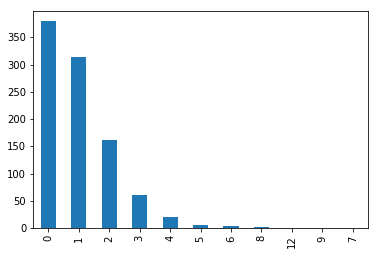

In [208]:
rankings_results['away_score'].value_counts().plot.bar()

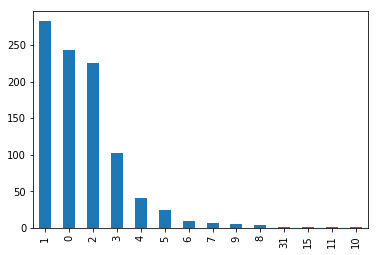

In [209]:
rankings_results['home_score'].value_counts().plot.bar()

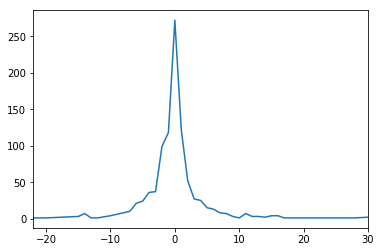

In [210]:
rankings_results['rank_change'].value_counts().sort_index().plot.line()

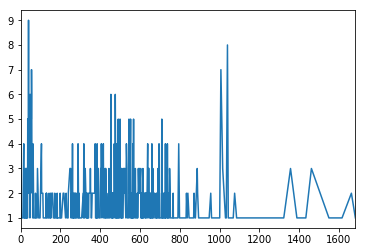

In [211]:
rankings_results['previous_points'].value_counts().sort_index().plot.line()

In [212]:
rankings_results['match_outcome'] = rankings_results['home_score'] - rankings_results['away_score']
rankings_results.head(6)

,rank,country,previous_points,rank_change,last_year_avg,last_year_avg_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,neutral,match_outcome
0,8,Brazil,55,-5,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,False,0
1,35,Ecuador,23,30,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,5
2,50,Zimbabwe,27,4,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False,2
3,59,Bolivia,13,28,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,2
4,65,Guinea,23,-2,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,1
5,67,Paraguay,22,1,0.0,0.0,CONMEBOL,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,-2


In [0]:
def convert(goals):
  if goals > 0:

    return 'Win' # 
  
  elif goals < 0:
    return 'Lose' # 
  else:
    return 'Draw' # 

rankings_results['match_outcome'] = rankings_results['match_outcome'].apply(lambda x: convert(x))

In [214]:
rankings_results.head(6)

,rank,country,previous_points,rank_change,last_year_avg,last_year_avg_weighted,confederation,date,home_team,away_team,home_score,away_score,tournament,neutral,match_outcome
0,8,Brazil,55,-5,0.0,0.0,CONMEBOL,1993-08-08,Brazil,Mexico,1,1,Friendly,False,Draw
1,35,Ecuador,23,30,0.0,0.0,CONMEBOL,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,Win
2,50,Zimbabwe,27,4,0.0,0.0,CAF,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False,Win
3,59,Bolivia,13,28,0.0,0.0,CONMEBOL,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,Win
4,65,Guinea,23,-2,0.0,0.0,CAF,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,Win
5,67,Paraguay,22,1,0.0,0.0,CONMEBOL,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,Lose


#POLYNOMIAL REGRESSION.

In [0]:

X_home =rankings_results[['rank', 'home_team', 'away_team', 'away_score','tournament']]
y_home =rankings_results['home_score']

In [0]:
x_home_train,x_home_test,y_home_train,y_home_test =train_test_split(X_home,y_home,test_size=0.2,random_state=0)

In [0]:
# Using polynomial regresion to fit and predict the model at degree 2
pf =PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_home_train)
x_test_poly = pf.fit_transform(x_home_test)

lr = LinearRegression()
lr.fit(x_train_poly,y_train_poly)

y_home_p_pred = lr.predict(x_test_poly)

#metrics of success
print("RMSE : ",np.sqrt(mean_squared_error(y_home_test,y_home_p_pred)))
print("r2_score is : ",r2_score(y_home_test,y_home_p_pred))
comp = pd.DataFrame({"Actual":y_home_test,"Predicted":y_home_p_pred}).head(25)
print(comp.describe())


In [130]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
#array([-0.75275929])
X_poly[0]
#array([-0.75275929, 0.56664654])

array([2.20000e+01, 4.84000e+02, 1.06480e+04, 2.34256e+05])

#RANDOM FOREST.

In [248]:
# One-hot encode categorical features
features = pd.get_dummies(rankings_results)
features.head(5)

,rank,previous_points,rank_change,last_year_avg,last_year_avg_weighted,home_score,away_score,neutral,country_Albania,country_Algeria,country_Andorra,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Canada,country_Cayman Islands,country_Chad,country_Chile,country_China PR,...,away_team_Zimbabwe,tournament_AFC Asian Cup,tournament_AFC Asian Cup qualification,tournament_AFC Challenge Cup qualification,tournament_AFF Championship,tournament_African Cup of Nations,tournament_African Cup of Nations qualification,tournament_African Nations Championship,tournament_CECAFA Cup,tournament_CFU Caribbean Cup,tournament_CFU Caribbean Cup qualification,tournament_CONIFA World Football Cup,tournament_COSAFA Cup,tournament_Confederations Cup,tournament_Copa América,tournament_Copa del Pacífico,tournament_Cyprus International Tournament,tournament_EAFF Championship,tournament_FIFA World Cup qualification,tournament_Friendly,tournament_Gold Cup qualification,tournament_Gulf Cup,tournament_Intercontinental Cup,tournament_King's Cup,tournament_Malta International Tournament,tournament_Merdeka Tournament,tournament_Millennium Cup,tournament_Nehru Cup,tournament_Oceania Nations Cup,tournament_Prime Minister's Cup,tournament_SAFF Cup,tournament_UAFA Cup,tournament_UEFA Euro qualification,tournament_UNCAF Cup,tournament_United Arab Emirates Friendship Tournament,tournament_Viva World Cup,tournament_Windward Islands Tournament,match_outcome_Draw,match_outcome_Lose,match_outcome_Win
0,8,55,-5,0.0,0.0,1,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,35,23,30,0.0,0.0,5,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,50,27,4,0.0,0.0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,59,13,28,0.0,0.0,3,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,65,23,-2,0.0,0.0,1,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [249]:
print('Shape of features after one-hot encoding:', features.shape)

Shape of features after one-hot encoding: (950, 757)


#Features and Labels.


In [0]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['home_score'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('home_score', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [252]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (712, 756)
Training Labels Shape: (712,)
Testing Features Shape: (238, 756)
Testing Labels Shape: (238,)


In [253]:
# The baseline predictions are previous points
baseline_preds = test_features[:, feature_list.index('previous_points')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('baseline error: ', round(np.mean(baseline_errors), 2), 'previous_points')

baseline error:  460.21 previous_points


#Training the forest.

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

We can create models with different hyperparameters to try and boost performance. The only way to find the best ones are to try a few and evaluate them!

In [0]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

# Making Predictions on Test Data.

In [257]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'units.')


Mean Absolute Error: 0.63 units.


In [258]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [259]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: match_outcome_Win    Importance: 0.28
Variable: away_team_American Samoa Importance: 0.2
Variable: away_score           Importance: 0.06
Variable: away_team_Bhutan     Importance: 0.04
Variable: rank_change          Importance: 0.03
Variable: rank                 Importance: 0.02
Variable: previous_points      Importance: 0.02
Variable: date_2001-04-11      Importance: 0.02
Variable: country_Australia    Importance: 0.01
Variable: country_Macau        Importance: 0.01
Variable: country_Qatar        Importance: 0.01
Variable: date_1999-02-24      Importance: 0.01
Variable: date_2004-06-09      Importance: 0.01
Variable: date_2008-10-08      Importance: 0.01
Variable: home_team_Australia  Importance: 0.01
Variable: home_team_Palestine  Importance: 0.01
Variable: home_team_Vietnam    Importance: 0.01
Variable: away_team_Brunei     Importance: 0.01
Variable: away_team_Dominican Republic Importance: 0.01
Variable: tournament_FIFA World Cup qualification Importance: 0.01
Variable: 

In [263]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('previous_points'), feature_list.index('previous_points')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'units.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.46 units.
Accuracy: -inf %.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


# VISUALIZATION OF THE MODEL.

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 